In [796]:
# %%
###### Start of import packages ######
import sys
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from statistics import mean, stdev
from sklearn import linear_model
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import cm as cm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb


pd.set_option('display.max_rows', 100)
###### To ignore warnings ######
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

###### End of import packages ######

sns.set()

In [797]:
# %%
dataset = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [798]:
dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [799]:
# %%
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [800]:
# # Inspect Correlation
# # corr = dataset.corrwith(dataset['GarageArea']).to_frame()
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

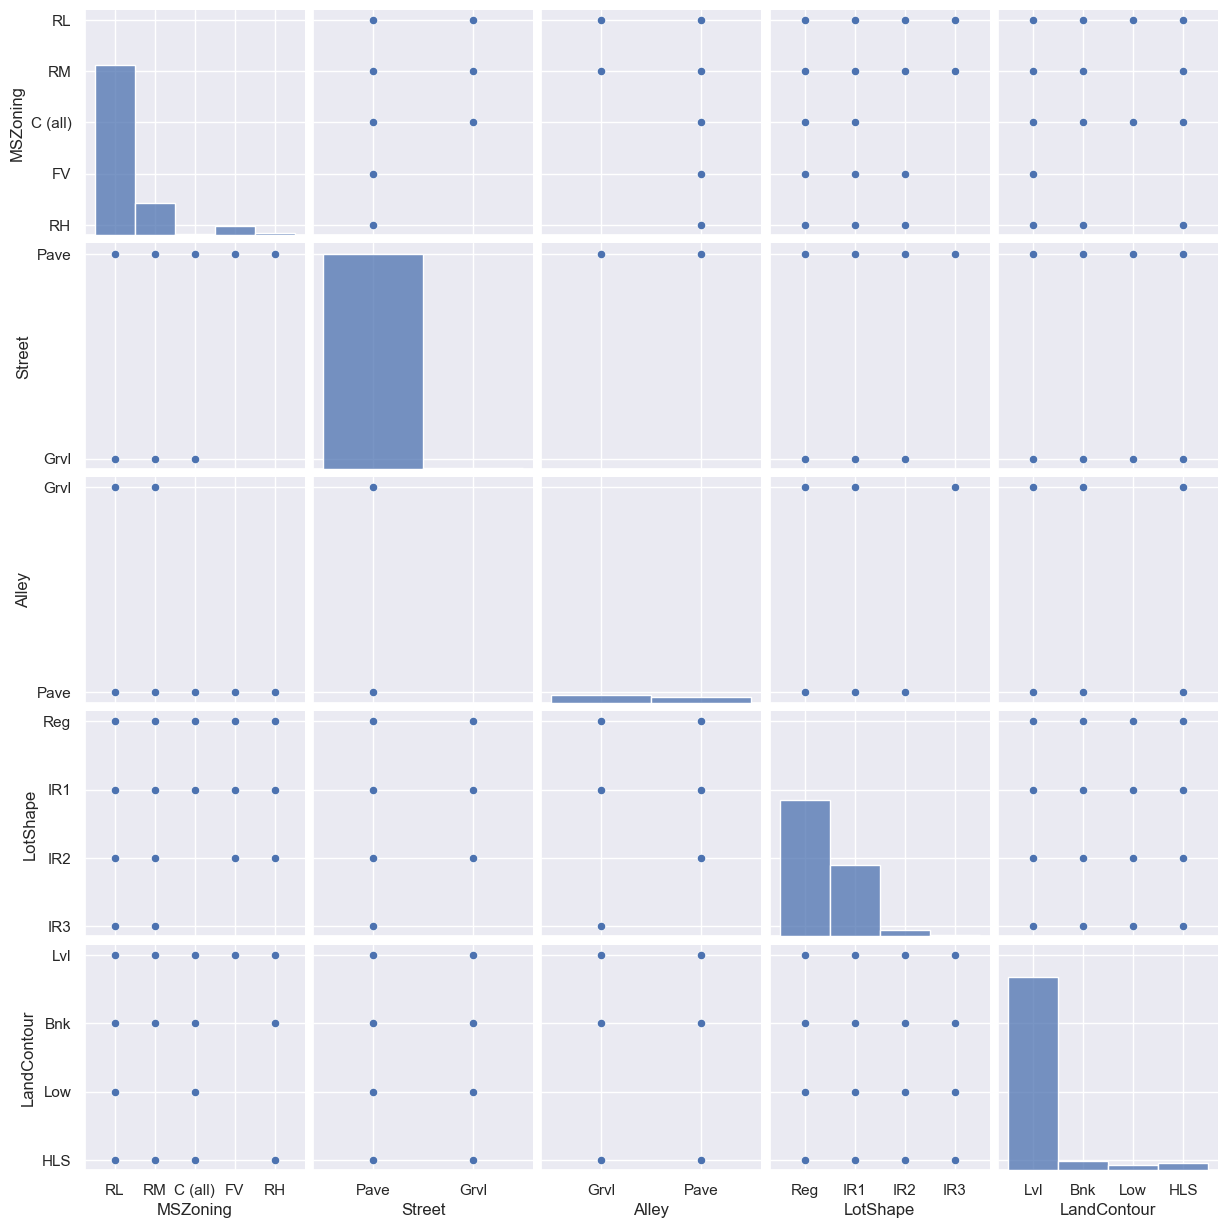

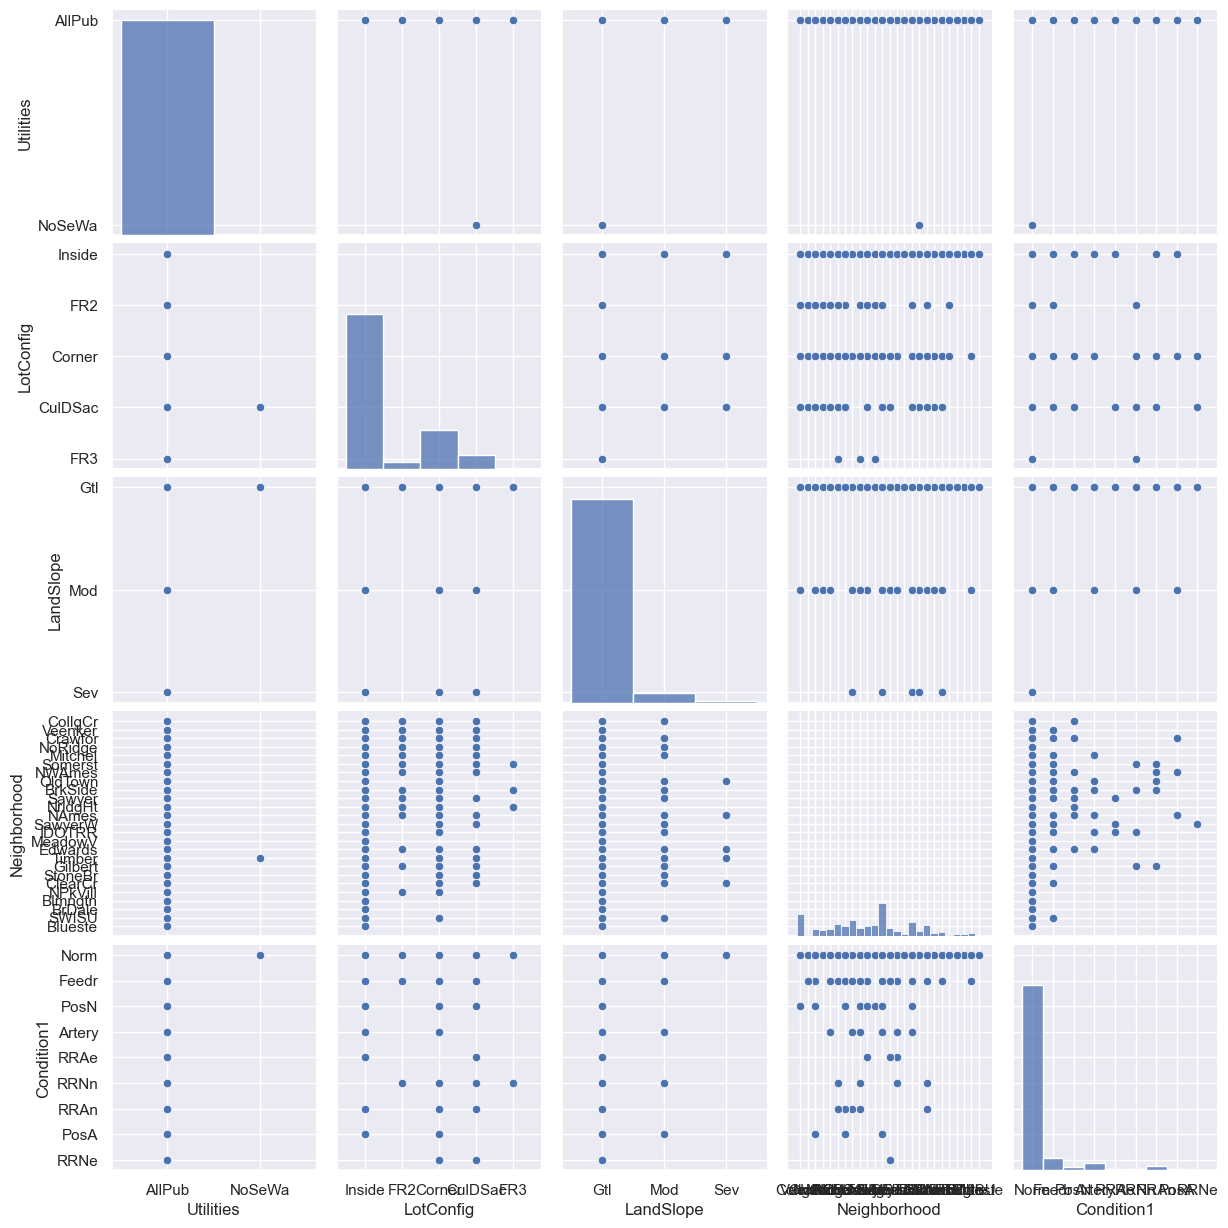

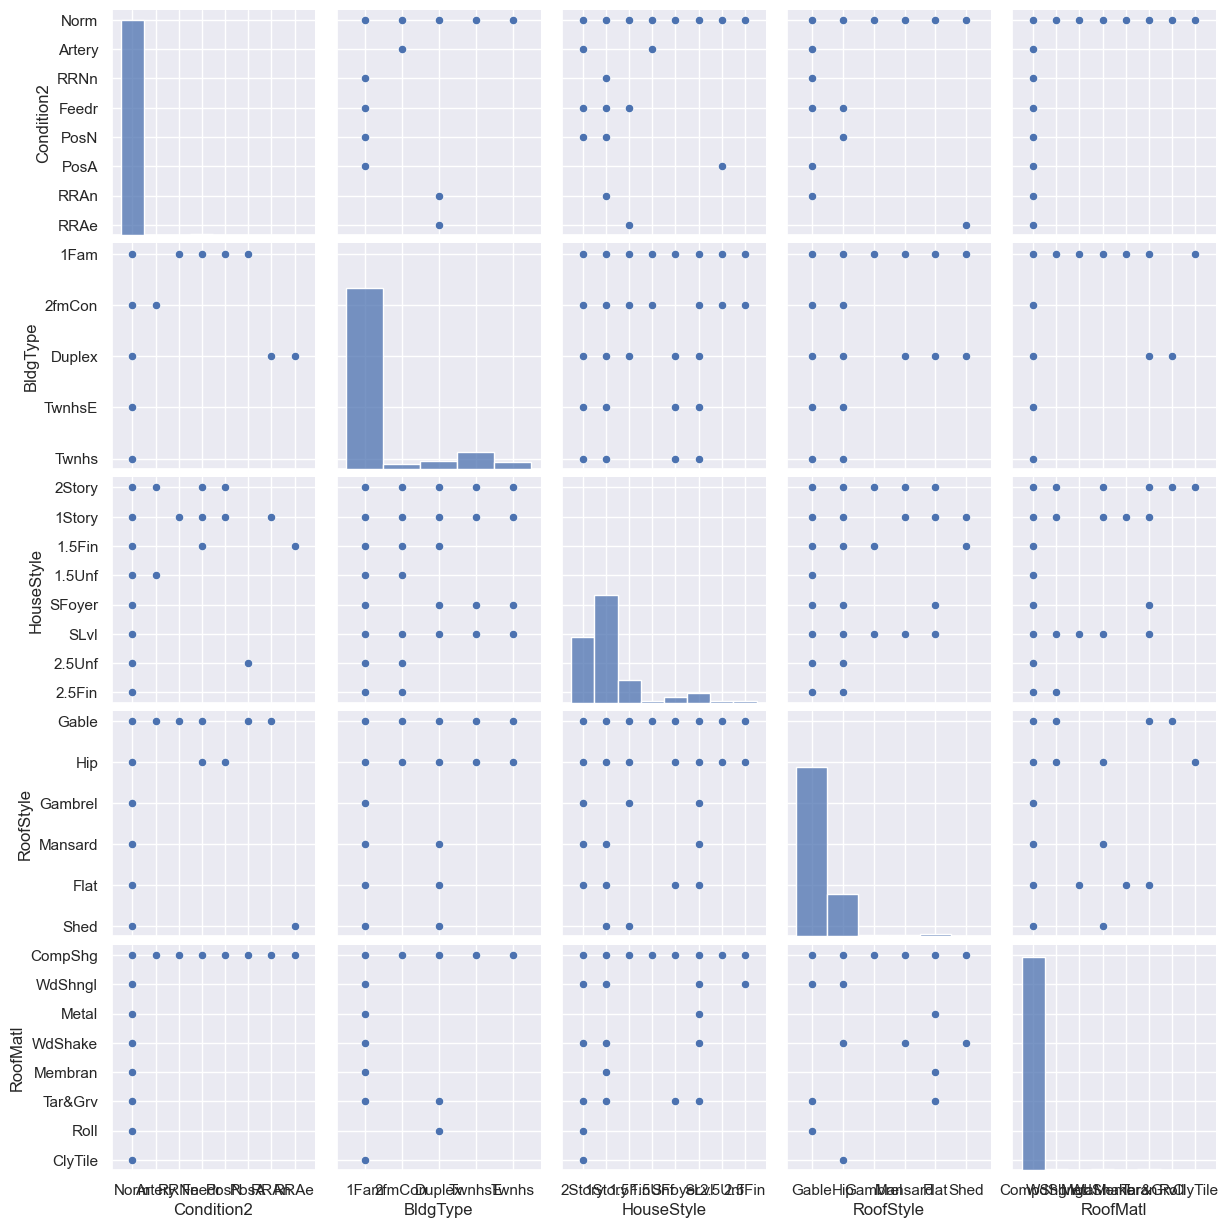

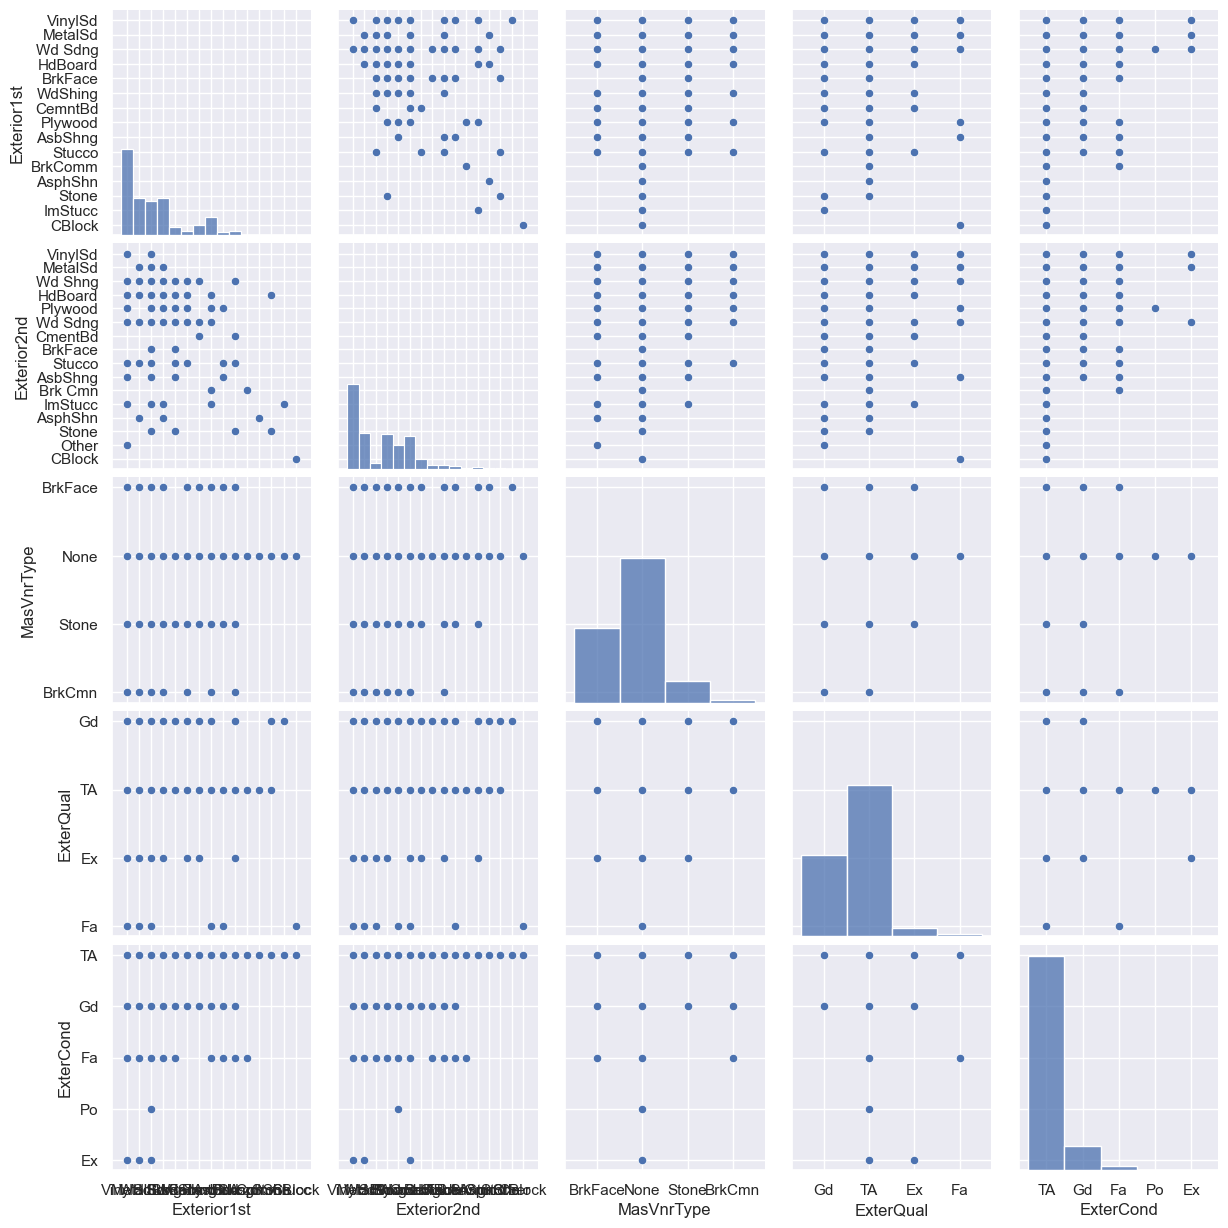

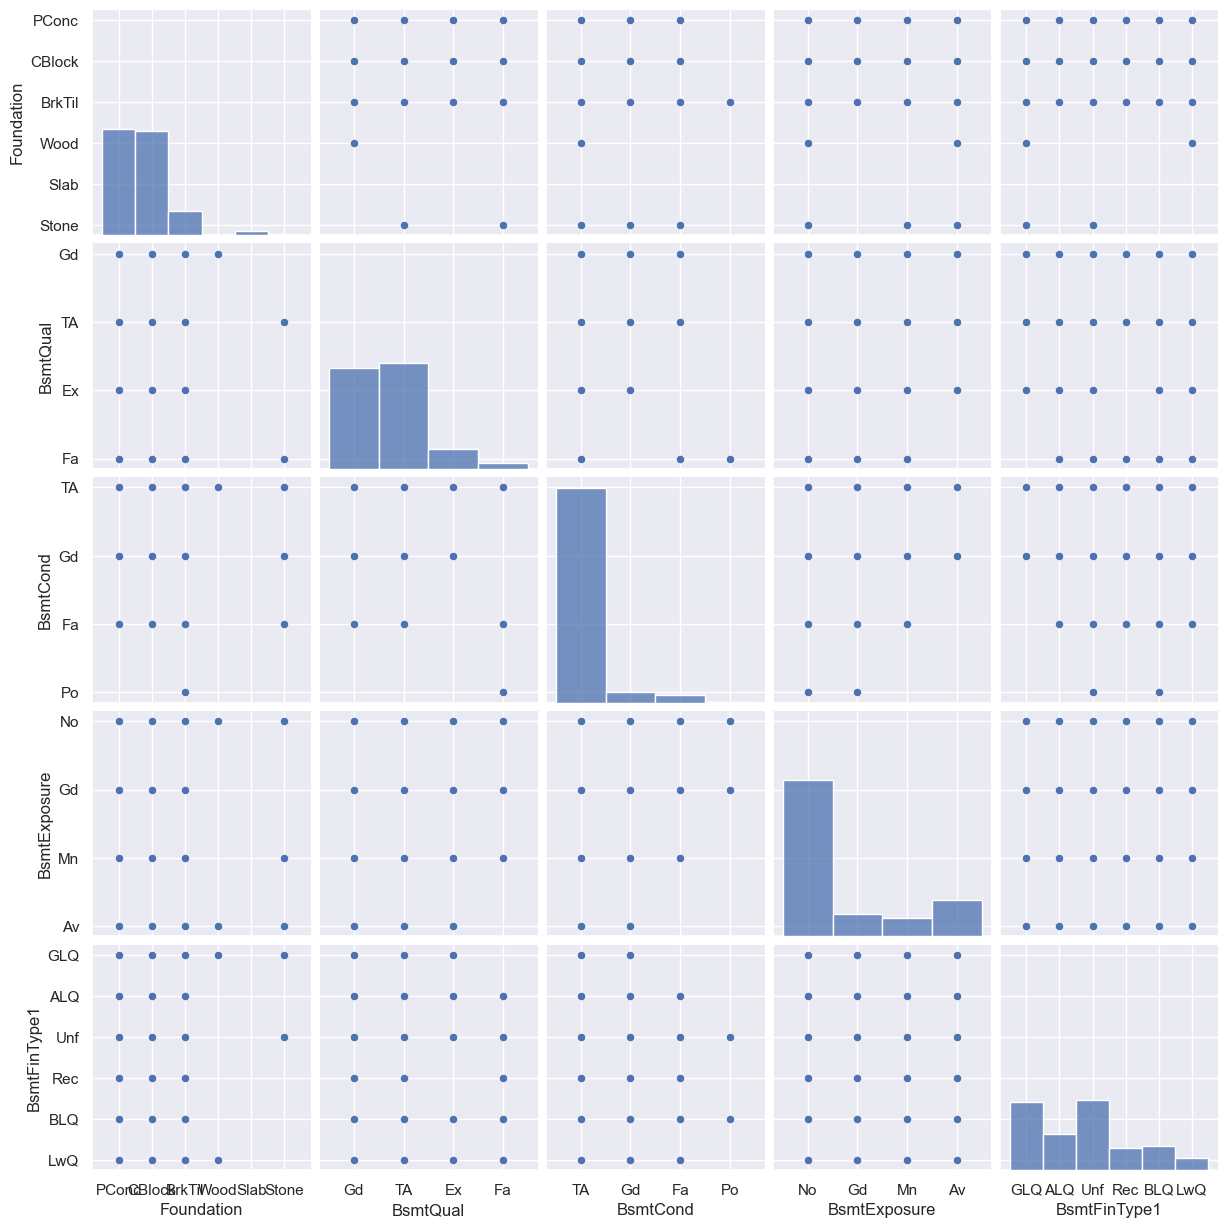

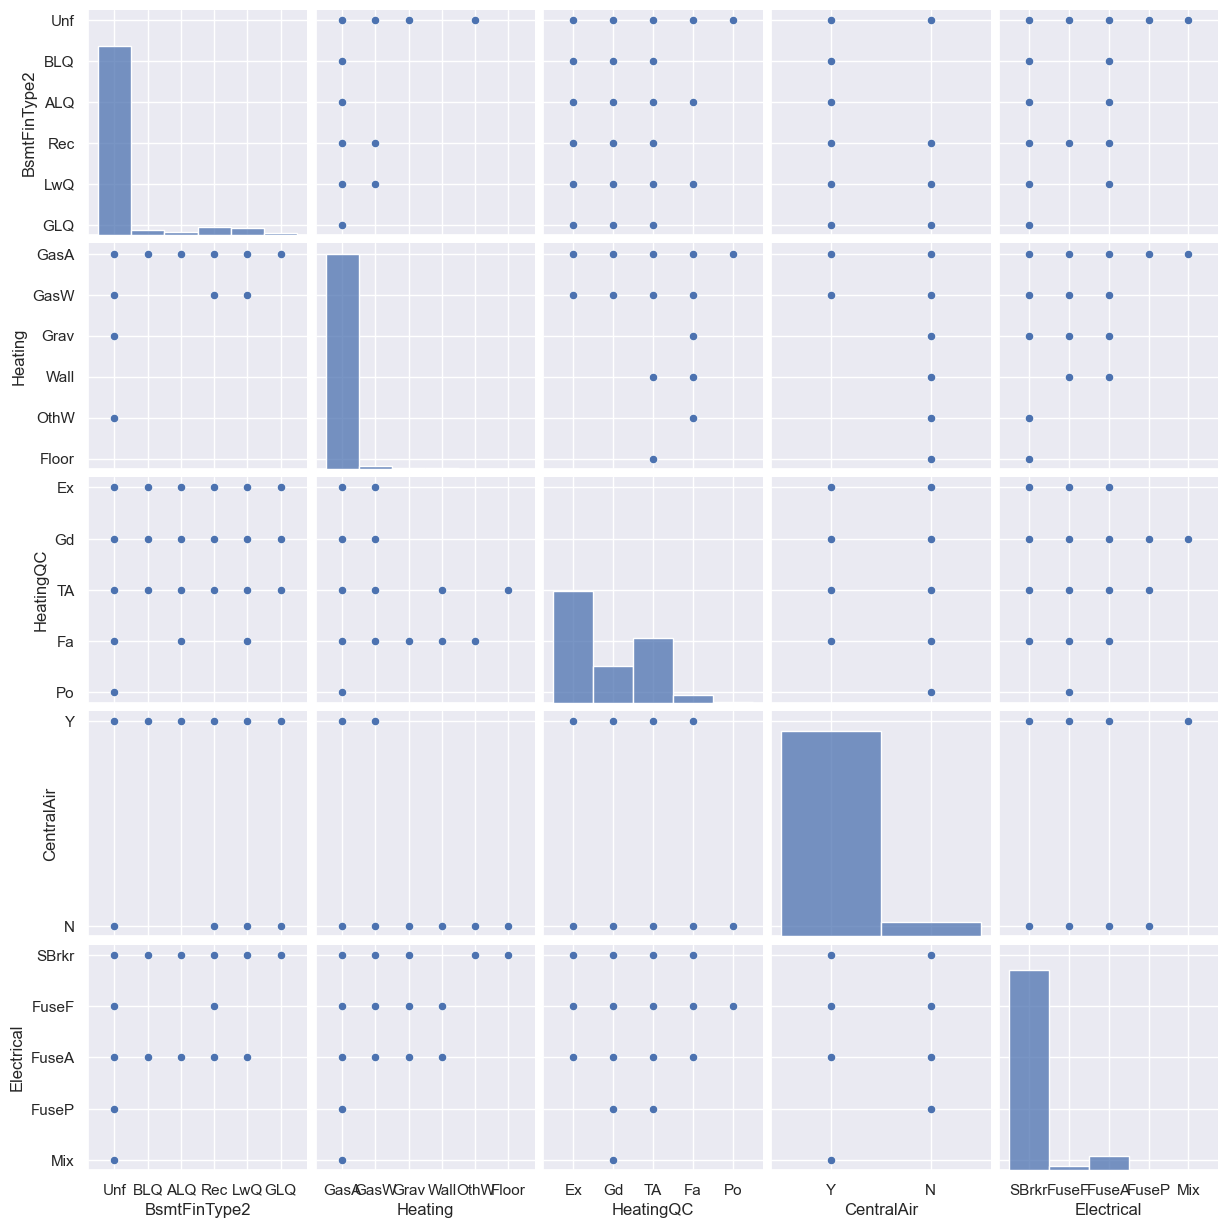

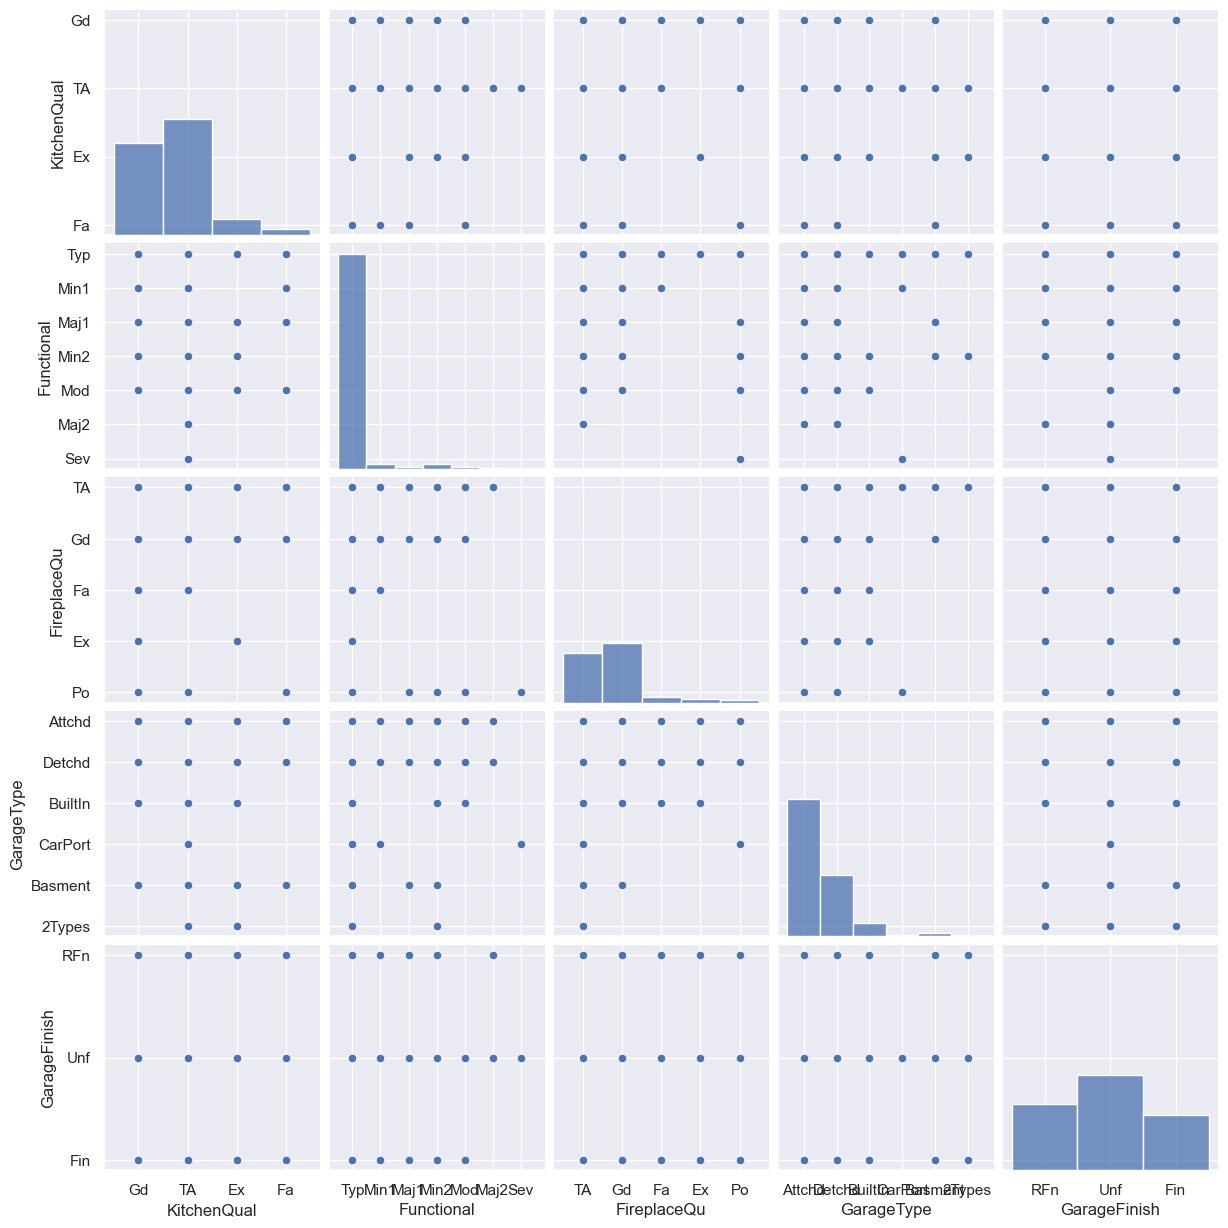

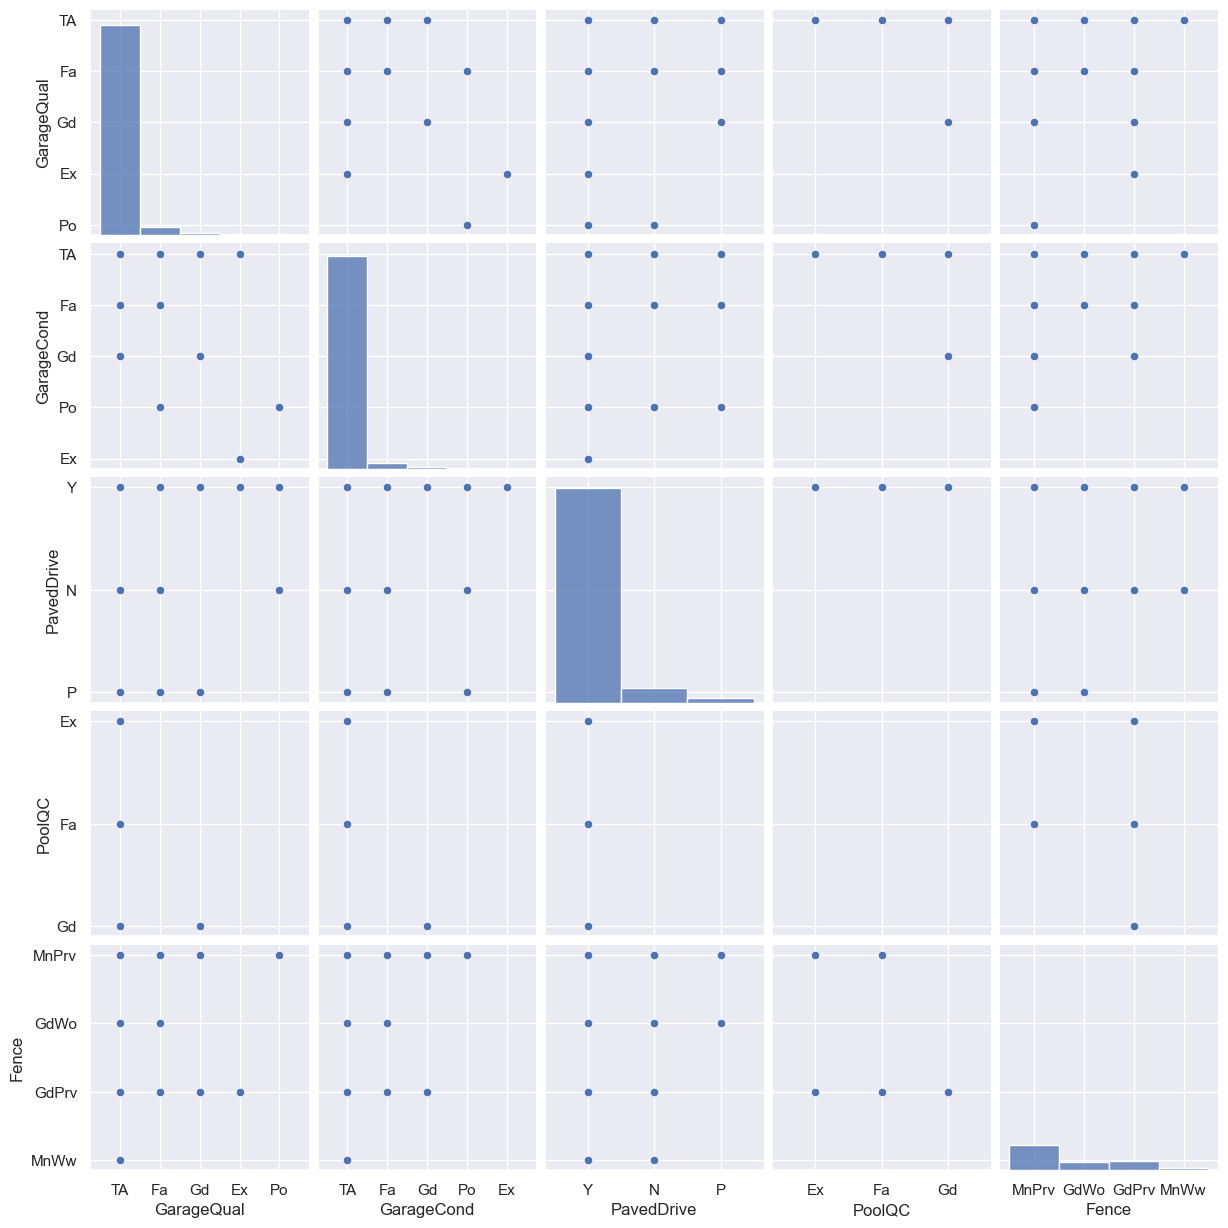

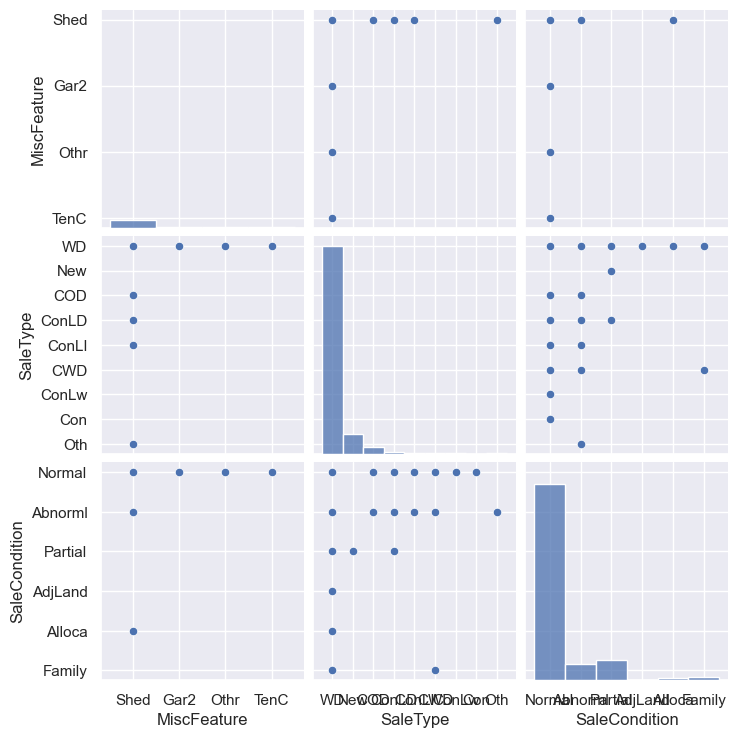

In [801]:
# # Category description graphs

dataset_numerical = dataset.select_dtypes(include = object)
dataset_numerical

def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]


cols = dataset_numerical.columns
for x in chunks(cols, 5):
    sns.pairplot(dataset_numerical, y_vars=x, x_vars=x)


In [726]:
# # Numerical description graphs
# dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
# dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [727]:
# %%
# Remove Nulls
# dataset.dropna(axis=1,inplace=True)
dataset.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
                 'Fence', 'MiscFeature','GarageType','GarageFinish'], axis=1, inplace=True)
# for x in range(0, dataset.shape[1]):
#     col = dataset.columns[x]
#     if (dataset[col].dtype == object):
#         dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
#     else:
#         dataset[col] = dataset[col].fillna(dataset[col].mean())



for i, column in enumerate(dataset):
    if (dataset[column].dtype == object):
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
    else:
        dataset[column] = dataset[column].fillna(dataset[column].mean())


In [728]:
# %%
# Drop Highly Correlated
dataset.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
                 'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)


In [729]:
# Drop Low Correlated
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
             "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
             "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
             "YrSold"]
dataset = dataset.drop(drops, axis=1)


In [730]:
# Drop outliers
dataset = dataset[(dataset['LotArea'] < 20000)]
dataset = dataset[(dataset['BsmtFinSF1'] < 2300)]
dataset = dataset[(dataset['TotalBsmtSF'] < 5000)]
dataset = dataset[(dataset['GrLivArea'] < 4600)]
dataset = dataset[(dataset['OpenPorchSF'] < 380)]


In [731]:
# Drop Not Important
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
             "GarageQual", "GarageCond", "PavedDrive",
             "PoolArea"]
dataset = dataset.drop(drops, axis=1)


In [732]:
# Drop One-Category
drops = [
'Condition1'  , 
'BldgType'    ,
'ExterCond'    ,
'BsmtQual'     ,
'CentralAir'   ,
'SaleType'     ,
'SaleCondition']
dataset = dataset.drop(drops, axis=1)

In [733]:
# # Numerical decription graphs
# dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
# dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [734]:
# # Inspect Correlation after removal
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [735]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,RL,8450,Reg,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,196.0,Gd,PConc,No,GLQ,706,150,856,Ex,854,1710,1,2,1,3,1,Gd,0,548,0,61,0,0,208500
1,2,RL,9600,Reg,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,0.0,TA,CBlock,Gd,ALQ,978,284,1262,Ex,0,1262,0,2,0,3,1,TA,1,460,298,0,0,0,181500
2,3,RL,11250,IR1,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,162.0,Gd,PConc,Mn,GLQ,486,434,920,Ex,866,1786,1,2,1,3,1,Gd,1,608,0,42,0,0,223500
3,4,RL,9550,IR1,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,0.0,TA,BrkTil,No,ALQ,216,540,756,Gd,756,1717,1,1,0,3,1,Gd,1,642,0,35,272,0,140000
4,5,RL,14260,IR1,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,350.0,Gd,PConc,Av,GLQ,655,490,1145,Ex,1053,2198,1,2,1,4,1,Gd,1,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,7917,Reg,Gilbert,2Story,6,5,1999,2000,Gable,VinylSd,0.0,TA,PConc,No,Unf,0,953,953,Ex,694,1647,0,2,1,3,1,TA,1,460,0,40,0,0,175000
1456,1457,RL,13175,Reg,NWAmes,1Story,6,6,1978,1988,Gable,Plywood,119.0,TA,CBlock,No,ALQ,790,589,1542,TA,0,2073,1,2,0,3,1,TA,2,500,349,0,0,0,210000
1457,1458,RL,9042,Reg,Crawfor,2Story,7,9,1941,2006,Gable,CemntBd,0.0,Ex,Stone,No,GLQ,275,877,1152,Ex,1152,2340,0,2,0,4,1,Gd,2,252,0,60,0,0,266500
1458,1459,RL,9717,Reg,NAmes,1Story,5,6,1950,1996,Hip,MetalSd,0.0,TA,CBlock,Mn,GLQ,49,0,1078,Gd,0,1078,1,1,0,2,1,Gd,0,240,366,0,112,0,142125


In [736]:
# dataset["SaleType_WD"] = dataset['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
# dataset["SaleType_CWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='CWD' else 0)
# dataset["SaleType_VWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='VWD' else 0)
# dataset["SaleType"] = dataset['SaleType'].apply(lambda x: 1 if x=="New" else 0)
# dataset["SaleType_COD"] = dataset['SaleType'].apply(lambda x: 1 if x=='COD' else 0)
# dataset["SaleType_Con"] = dataset['SaleType'].apply(lambda x: 1 if x=='Con' else 0)
# dataset["SaleType_ConLw"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLw' else 0)
# dataset["SaleType_ConLI"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLI' else 0)
# dataset["SaleType_ConLD"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLD' else 0)
# dataset["SaleType_Oth"] = dataset['SaleType'].apply(lambda x: 1 if x=='Oth' else 0)
dataset['EnclosedPorch'] = dataset['EnclosedPorch'].apply(lambda x: 1 if x>0 else 0)
dataset['ScreenPorch'] = dataset['ScreenPorch'].apply(lambda x: 1 if x>0 else 0)

In [737]:
# # Inspect Correlation after removal
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [738]:
# Categorical features
cat_features = np.array([i for i in dataset.columns.tolist() if dataset[i].dtype == 'object'])

In [739]:
dataset[cat_features]

,MSZoning,LotShape,Neighborhood,HouseStyle,RoofStyle,Exterior1st,ExterQual,Foundation,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual
0,RL,Reg,CollgCr,2Story,Gable,VinylSd,Gd,PConc,No,GLQ,Ex,Gd
1,RL,Reg,Veenker,1Story,Gable,MetalSd,TA,CBlock,Gd,ALQ,Ex,TA
2,RL,IR1,CollgCr,2Story,Gable,VinylSd,Gd,PConc,Mn,GLQ,Ex,Gd
3,RL,IR1,Crawfor,2Story,Gable,Wd Sdng,TA,BrkTil,No,ALQ,Gd,Gd
4,RL,IR1,NoRidge,2Story,Gable,VinylSd,Gd,PConc,Av,GLQ,Ex,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Gilbert,2Story,Gable,VinylSd,TA,PConc,No,Unf,Ex,TA
1456,RL,Reg,NWAmes,1Story,Gable,Plywood,TA,CBlock,No,ALQ,TA,TA
1457,RL,Reg,Crawfor,2Story,Gable,CemntBd,Ex,Stone,No,GLQ,Ex,Gd
1458,RL,Reg,NAmes,1Story,Hip,MetalSd,TA,CBlock,Mn,GLQ,Gd,Gd


In [740]:
# Category Plotting
# i=1
# for col in cat_features:
#     plt.figure(i,figsize=(10,10))
#     plt.subplot(224)
#     sns.histplot(data=dataset,x=dataset[col])
#     i+=1
# plt.show    

In [741]:
# # Transform to Object
# for x in range(0, dataset.shape[1]):
#     if (dataset[dataset.columns[x]].dtype == object):
#         le = preprocessing.LabelEncoder()
#         le.fit(dataset[dataset.columns[x]])
#         dataset[dataset.columns[x]] = le.transform(dataset[dataset.columns[x]])

# Categorical Data Encoding
enc_list = {}

for i in cat_features:
    enc_list[i] = preprocessing.LabelEncoder()
    dataset[i] = enc_list[i].fit_transform(dataset[i])


# dataset = pd.get_dummies(dataset,drop_first=True)


In [742]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,3,8450,3,5,5,7,5,2003,2003,1,12,196.0,2,2,3,2,706,150,856,0,854,1710,1,2,1,3,1,2,0,548,0,61,0,0,208500
1,2,3,9600,3,24,2,6,8,1976,1976,1,8,0.0,3,1,1,0,978,284,1262,0,0,1262,0,2,0,3,1,3,1,460,298,0,0,0,181500
2,3,3,11250,0,5,5,7,5,2001,2002,1,12,162.0,2,2,2,2,486,434,920,0,866,1786,1,2,1,3,1,2,1,608,0,42,0,0,223500
3,4,3,9550,0,6,5,7,5,1915,1970,1,13,0.0,3,0,3,0,216,540,756,2,756,1717,1,1,0,3,1,2,1,642,0,35,1,0,140000
4,5,3,14260,0,15,5,8,5,2000,2000,1,12,350.0,2,2,0,2,655,490,1145,0,1053,2198,1,2,1,4,1,2,1,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,7917,3,8,5,6,5,1999,2000,1,12,0.0,3,2,3,5,0,953,953,0,694,1647,0,2,1,3,1,3,1,460,0,40,0,0,175000
1456,1457,3,13175,3,14,2,6,6,1978,1988,1,9,119.0,3,1,3,0,790,589,1542,4,0,2073,1,2,0,3,1,3,2,500,349,0,0,0,210000
1457,1458,3,9042,3,6,5,7,9,1941,2006,1,5,0.0,0,4,3,2,275,877,1152,0,1152,2340,0,2,0,4,1,2,2,252,0,60,0,0,266500
1458,1459,3,9717,3,12,2,5,6,1950,1996,3,8,0.0,3,1,2,2,49,0,1078,2,0,1078,1,1,0,2,1,2,0,240,366,0,1,0,142125


In [743]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=10)
# dataset = imputer.fit_transform(dataset)

In [744]:
# # # plot_features_to_SalePrice
# def chunks(l, n):
#     return [l[i:i + n] for i in range(0, len(l), n)]

# cols = dataset.columns
# for x in chunks(cols, 5):
#     sns.pairplot(dataset, y_vars=['SalePrice'], x_vars=x)

In [745]:
# # Correlation after transformation
# corr = dataset.corr()
# plt.figure(figsize=(50, 50))
# sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
# plt.show()

In [746]:
# # Scale Data
dataset.BsmtFinSF1 = np.log1p(dataset.BsmtFinSF1)
dataset.BsmtUnfSF = np.log1p(dataset.BsmtUnfSF)
dataset.TotalBsmtSF = np.log1p(dataset.TotalBsmtSF)
dataset.GarageArea = np.log1p(dataset.GarageArea)
dataset.GrLivArea = np.log1p(dataset.GrLivArea)
dataset.LotArea = np.log1p(dataset.LotArea)
dataset.MasVnrArea = np.log1p(dataset.MasVnrArea)
dataset.OpenPorchSF = np.log1p(dataset.OpenPorchSF)
dataset.EnclosedPorch = np.log1p(dataset.EnclosedPorch)
dataset.WoodDeckSF = np.log1p(dataset.WoodDeckSF)

In [747]:
pd.set_option('display.max_columns',None)
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,3,9.042040,3,5,5,7,5,2003,2003,1,12,5.283204,2,2,3,2,6.561031,5.017280,6.753438,0,854,7.444833,1,2,1,3,1,2,0,6.308098,0.000000,4.127134,0.000000,0,208500
1,2,3,9.169623,3,24,2,6,8,1976,1976,1,8,0.000000,3,1,1,0,6.886532,5.652489,7.141245,0,0,7.141245,0,2,0,3,1,3,1,6.133398,5.700444,0.000000,0.000000,0,181500
2,3,3,9.328212,0,5,5,7,5,2001,2002,1,12,5.093750,2,2,2,2,6.188264,6.075346,6.825460,0,866,7.488294,1,2,1,3,1,2,1,6.411818,0.000000,3.761200,0.000000,0,223500
3,4,3,9.164401,0,6,5,7,5,1915,1970,1,13,0.000000,3,0,3,0,5.379897,6.293419,6.629363,2,756,7.448916,1,1,0,3,1,2,1,6.466145,0.000000,3.583519,0.693147,0,140000
4,5,3,9.565284,0,15,5,8,5,2000,2000,1,12,5.860786,2,2,0,2,6.486161,6.196444,7.044033,0,1053,7.695758,1,2,1,4,1,2,1,6.729824,5.262690,4.442651,0.000000,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,8.976894,3,8,5,6,5,1999,2000,1,12,0.000000,3,2,3,5,0.000000,6.860664,6.860664,0,694,7.407318,0,2,1,3,1,3,1,6.133398,0.000000,3.713572,0.000000,0,175000
1456,1457,3,9.486152,3,14,2,6,6,1978,1988,1,9,4.787492,3,1,3,0,6.673298,6.380123,7.341484,4,0,7.637234,1,2,0,3,1,3,2,6.216606,5.857933,0.000000,0.000000,0,210000
1457,1458,3,9.109746,3,6,5,7,9,1941,2006,1,5,0.000000,0,4,3,2,5.620401,6.777647,7.050123,0,1152,7.758333,0,2,0,4,1,2,2,5.533389,0.000000,4.110874,0.000000,0,266500
1458,1459,3,9.181735,3,12,2,5,6,1950,1996,3,8,0.000000,3,1,2,2,3.912023,0.000000,6.983790,2,0,6.983790,1,1,0,2,1,2,0,5.484797,5.905362,0.000000,0.693147,0,142125


In [748]:
# # # Scale Price
dataset.SalePrice = np.log1p(dataset.SalePrice)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'OpenPorchSF'

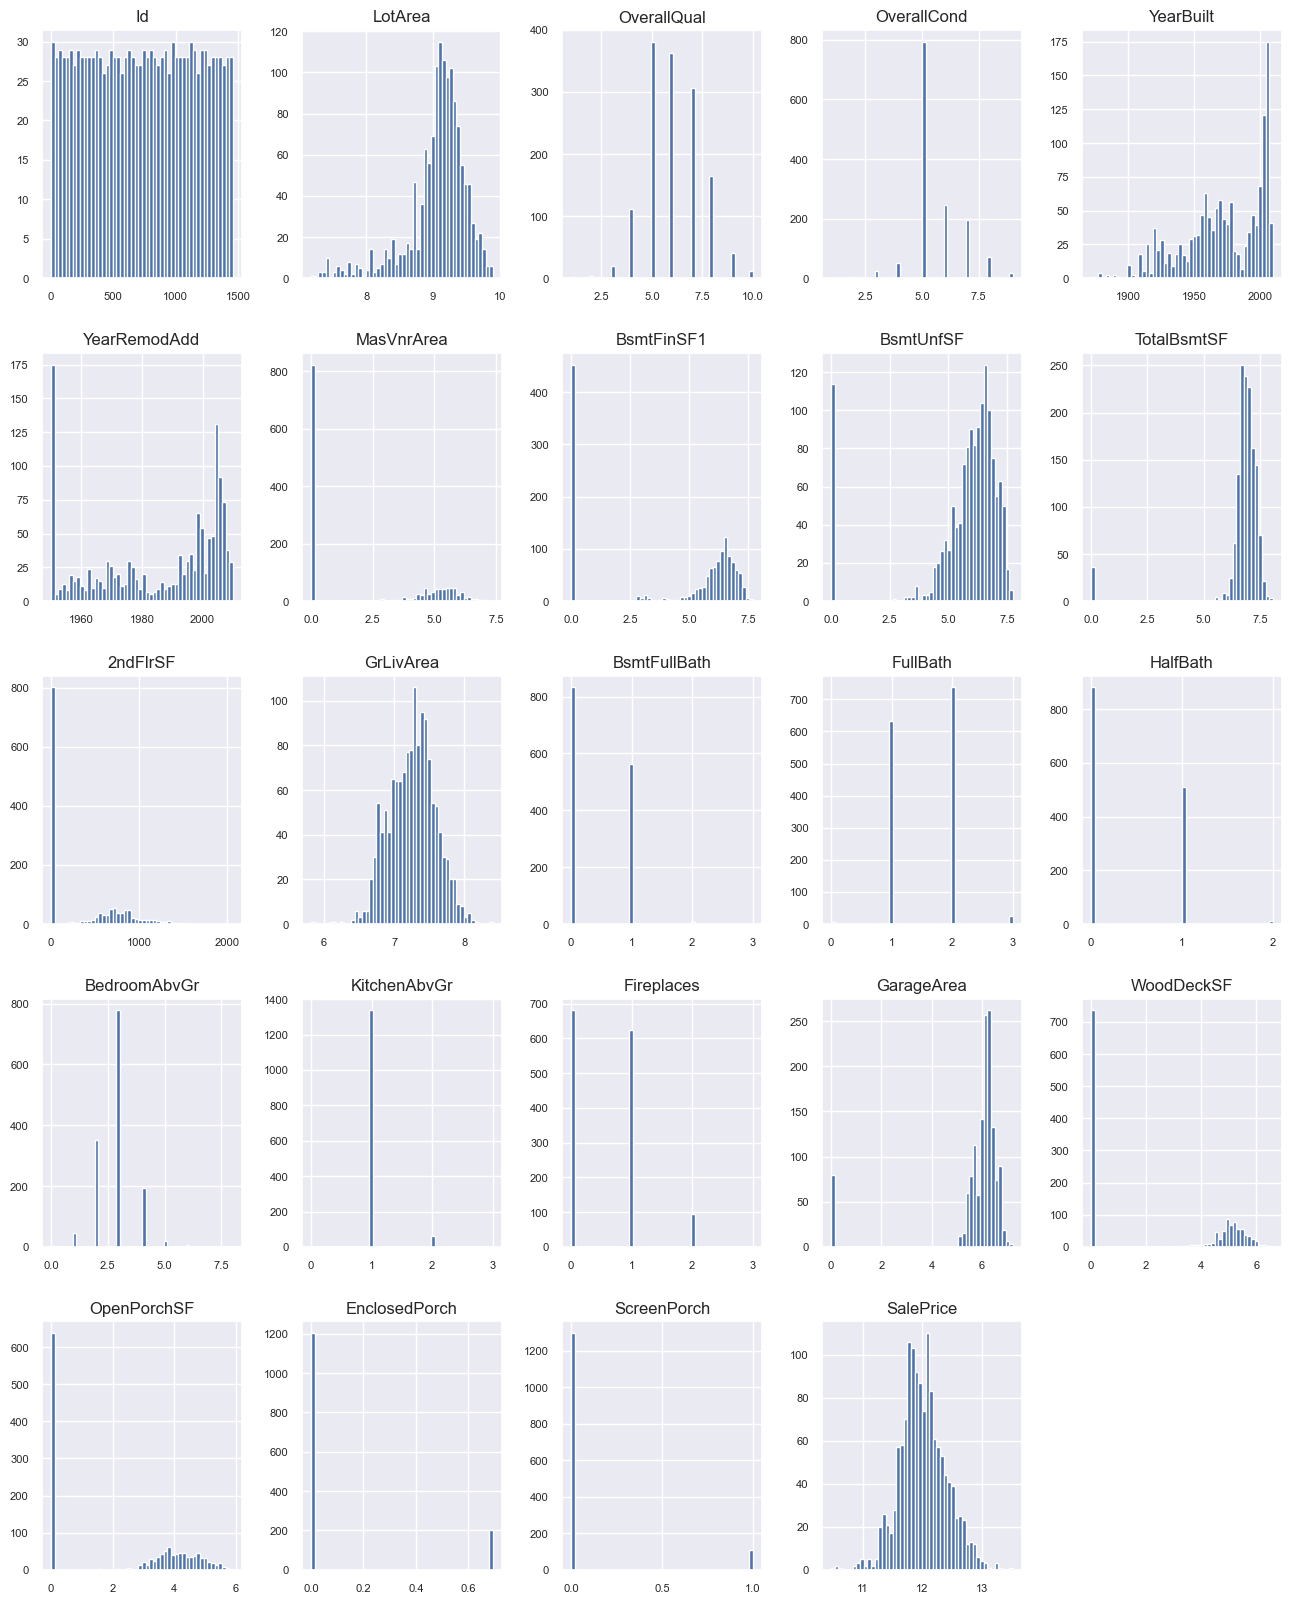

In [749]:
dataset_numerical = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [750]:
# Remove Nulls Test
test.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
                 'Fence', 'MiscFeature','GarageType','GarageFinish'], axis=1, inplace=True)
# for x in range(0, test.shape[1]):
#     col = test.columns[x]
#     if (test[col].dtype == object):
#         test[col] = test[col].fillna(test[col].mode()[0])
#     else:
#         test[col] = test[col].fillna(test[col].mean())
for i, column in enumerate(test):
    if (test[column].dtype == object):
        test[column] = test[column].fillna(test[column].mode()[0])
    else:
        test[column] = test[column].fillna(test[column].mean())

In [751]:
# Drop Highly Corr Test
test.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
                 'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)

In [752]:
# Drop Low Corr Test
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
             "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
             "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
             "YrSold"]
test = test.drop(drops, axis=1)

In [753]:
# Not Important Test
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
             "GarageQual", "GarageCond", "PavedDrive",
             "PoolArea"]
test = test.drop(drops, axis=1)

In [754]:
# Drop One-Category
drops = [
'Condition1'  , 
'BldgType'    ,
'ExterCond'    ,
'BsmtQual'     ,
'CentralAir'   ,
'SaleType'     ,
'SaleCondition']
test = test.drop(drops, axis=1)

In [755]:
# dataset["SaleType_WD"] = dataset['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
# dataset["SaleType_CWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='CWD' else 0)
# dataset["SaleType_VWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='VWD' else 0)
# test["SaleType"] = test['SaleType'].apply(lambda x: 1 if x=='New' else 0)
# dataset["SaleType_COD"] = dataset['SaleType'].apply(lambda x: 1 if x=='COD' else 0)
# dataset["SaleType_Con"] = dataset['SaleType'].apply(lambda x: 1 if x=='Con' else 0)
# dataset["SaleType_ConLw"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLw' else 0)
# dataset["SaleType_ConLI"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLI' else 0)
# dataset["SaleType_ConLD"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLD' else 0)
# dataset["SaleType_Oth"] = dataset['SaleType'].apply(lambda x: 1 if x=='Oth' else 0)
test['EnclosedPorch'] = test['EnclosedPorch'].apply(lambda x: 1 if x>0 else 0)
test['ScreenPorch'] = test['ScreenPorch'].apply(lambda x: 1 if x>0 else 0)

In [756]:
# Categorical features
cat_features = np.array([i for i in test.columns.tolist() if test[i].dtype == 'object'])

In [757]:
test

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1461,RH,11622,Reg,NAmes,1Story,5,6,1961,1961,Gable,VinylSd,0.0,TA,CBlock,No,Rec,468.0,270.0,882.0,TA,0,896,0.0,1,0,2,1,TA,0,730.0,140,0,0,1
1,1462,RL,14267,IR1,NAmes,1Story,6,6,1958,1958,Hip,Wd Sdng,108.0,TA,CBlock,No,ALQ,923.0,406.0,1329.0,TA,0,1329,0.0,1,1,3,1,Gd,0,312.0,393,36,0,0
2,1463,RL,13830,IR1,Gilbert,2Story,5,5,1997,1998,Gable,VinylSd,0.0,TA,PConc,No,GLQ,791.0,137.0,928.0,Gd,701,1629,0.0,2,1,3,1,TA,1,482.0,212,34,0,0
3,1464,RL,9978,IR1,Gilbert,2Story,6,6,1998,1998,Gable,VinylSd,20.0,TA,PConc,No,GLQ,602.0,324.0,926.0,Ex,678,1604,0.0,2,1,3,1,Gd,1,470.0,360,36,0,0
4,1465,RL,5005,IR1,StoneBr,1Story,8,5,1992,1992,Gable,HdBoard,0.0,Gd,PConc,No,ALQ,263.0,1017.0,1280.0,Ex,0,1280,0.0,2,0,2,1,Gd,0,506.0,0,82,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,1936,Reg,MeadowV,2Story,4,7,1970,1970,Gable,CemntBd,0.0,TA,CBlock,No,Unf,0.0,546.0,546.0,Gd,546,1092,0.0,1,1,3,1,TA,0,0.0,0,0,0,0
1455,2916,RM,1894,Reg,MeadowV,2Story,4,5,1970,1970,Gable,CemntBd,0.0,TA,CBlock,No,Rec,252.0,294.0,546.0,TA,546,1092,0.0,1,1,3,1,TA,0,286.0,0,24,0,0
1456,2917,RL,20000,Reg,Mitchel,1Story,5,7,1960,1996,Gable,VinylSd,0.0,TA,CBlock,No,ALQ,1224.0,0.0,1224.0,Ex,0,1224,1.0,1,0,4,1,TA,1,576.0,474,0,0,0
1457,2918,RL,10441,Reg,Mitchel,SFoyer,5,5,1992,1992,Gable,HdBoard,0.0,TA,PConc,Av,GLQ,337.0,575.0,912.0,TA,0,970,0.0,1,0,3,1,TA,0,0.0,80,32,0,0


In [758]:
# # Transform Object Test
# for x in range(0, test.shape[1]):
#         if (test[test.columns[x]].dtype == object):
#             le = preprocessing.LabelEncoder()
#             le.fit(test[test.columns[x]])
#             test[test.columns[x]] = le.transform(
#                 test[test.columns[x]])
# Categorical Data Encoding test
for i in cat_features:
    test[i] = enc_list[i].fit_transform(test[i])


# test = pd.get_dummies(test,drop_first=True)

In [759]:
# test = imputer.fit_transform(test)

In [760]:
# # # Scale Data
# # # dataset = np.log1p(dataset)
test.BsmtFinSF1 = np.log1p(test.BsmtFinSF1)
test.BsmtUnfSF = np.log1p(test.BsmtUnfSF)
test.TotalBsmtSF = np.log1p(test.TotalBsmtSF)
test.GarageArea = np.log1p(test.GarageArea)
test.GrLivArea = np.log1p(test.GrLivArea)
test.LotArea = np.log1p(test.LotArea)
test.MasVnrArea = np.log1p(test.MasVnrArea)
test.OpenPorchSF = np.log1p(test.OpenPorchSF)
test.EnclosedPorch = np.log1p(test.EnclosedPorch)
test.WoodDeckSF = np.log1p(test.WoodDeckSF)

In [761]:
# cols = dataset.columns.tolist()
# test = test.reindex(columns=cols).fillna(0)

In [762]:
print(dataset.shape)
print(test.shape)

(1403, 36)
(1459, 35)


In [763]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

array = dataset.values
testarray = test.values
n = dataset.shape[1]
n = n-1

# test_X = testarray[:, 0:n]  # features
X = dataset.iloc[:,0:n]  # features
Y = dataset['SalePrice']  # target

In [764]:
# from sklearn.discriminant_analysis import StandardScaler
# from sklearn.pipeline import Pipeline


# pipeline1 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('linearregression', LinearRegression())
# ])

# param_grid = {'linearregression__fit_intercept': [True, False],
#               'linearregression__copy_X': [True, False]
#               }

# grid_search1 = GridSearchCV(pipeline1, param_grid, cv=12)
# grid_search1.fit(X,Y)

# print('Parameters : ', grid_search1.best_params_,'\nAccuracy Score : ', grid_search1.best_score_)

In [765]:
# from sklearn.tree import DecisionTreeRegressor

# pipeline2 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf2', DecisionTreeRegressor(random_state=42))
# ])

# param_grid2 = {
#     'clf2__max_depth': [2, 3, 4, 5],
#     'clf2__min_samples_split': [2, 5, 10],
#     'clf2__min_samples_leaf': [1, 2, 4],
#     'clf2__max_leaf_nodes': [None, 5, 10, 20]
# }

# grid_search2 = GridSearchCV(pipeline2, param_grid2, cv=15)
# grid_search2.fit(X,Y)

# print('Parameters : ', grid_search2.best_params_,'\nAccuracy Score : ', grid_search2.best_score_)

In [766]:
# pipeline5 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf5', RandomForestRegressor())
# ])

# param_grid5 = {
#     'clf5__n_estimators': [10, 50],
#     'clf5__max_features': ['auto', 'sqrt'],
#     'clf5__max_depth': [5, 15],
#     'clf5__min_samples_split': [2, 5],
#     'clf5__min_samples_leaf': [1, 3],
# }

# grid_search5 = GridSearchCV(pipeline5, param_grid5, cv=10,n_jobs=8)
# grid_search5.fit(X,Y)

# print('Parameters : ', grid_search5.best_params_,'\nAccuracy Score : ', grid_search5.best_score_)

In [767]:
# print("\nRandom Forest")
# rfr = RandomForestRegressor(max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
# rfr.fit(X, Y)

In [768]:
# result = np.exp(rfr.predict(test.iloc[:,1:35]))
# output = pd.DataFrame({'Id': test.Id, 'SalePrice': result})
# print(output)
# output.to_csv('submission.csv', index=False)

In [769]:
# pipeline6 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf6', ensemble.GradientBoostingRegressor())
# ])

# param_grid6 = {
#     'clf6__n_estimators': [1000,2000,3000,4000],
#     'clf6__random_state': [1000,1234,1269],
#     'clf6__max_features': ['auto', 'sqrt', 'log2'],
#     'clf6__max_depth': [3,5, 15],
#     'clf6__min_samples_split': [2, 5,10,15],
#     'clf6__min_samples_leaf': [1, 3 ,6,11,15],
# }

# grid_search6 = GridSearchCV(pipeline6, param_grid6, cv=5,n_jobs=8)
# grid_search6.fit(X,Y)

# print('Parameters : ', grid_search6.best_params_,'\nAccuracy Score : ', grid_search6.best_score_)

best combination (ACC: 0.951): (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 34)



(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

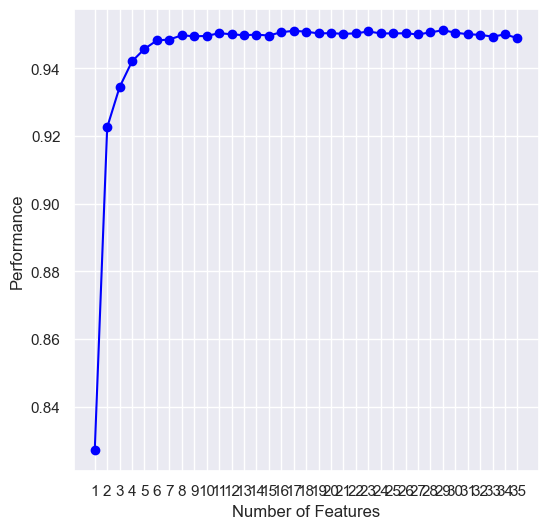

In [770]:
# XX = dataset.iloc[:, ~dataset.columns.isin(['Id','SalePrice'])]
# YY = dataset[['SalePrice']]

def mrse(y_true,y_pred):
    return 1 - np.sqrt(mean_squared_error(y_true,y_pred))

scorer = make_scorer(mrse,greater_is_better=True)


rfr = RandomForestRegressor()
sfs_range = SFS(estimator=rfr,
                k_features=(6,35),
                forward=True,
                floating=False,
                scoring=scorer,
                cv=0,n_jobs=8)

sfs_range.fit(X,Y)

# print the accuracy of the best combination as well as the set of best features
print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))

plt.rcParams["figure.figsize"] = (6,6)
# use the plot_sfs to visualize all accuracies
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [771]:
X_sfs = sfs_range.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_sfs, Y, test_size=0.2, random_state=200)  # test = 40%, train = 60%


In [772]:
print("\nElasticNet")
ens_test = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.0015, 0.01, 0.015, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                                     l1_ratio=[0.01, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], max_iter=10000).fit(x_train, y_train)
ens_result = ens_test.predict(x_test)
print('\tR2: {}'.format(r2_score(ens_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ens_result, y_test))))
scores = cross_val_score(ens_test, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



ElasticNet
	R2: 0.8392761984878948
	RMSE: 0.1361873510147666
	Accuracy: 0.90 (+/- 0.02)


In [773]:
# print("\nXgBoost")
# xg_reg = xgb.XGBRegressor(objective='reg:linear', eval_metric='logloss',
#                           scoring='neg_mean_squared_error', subsample=0.95, colsample_bytree=0.3, learning_rate=0.04,
#                           max_depth=2, alpha=0.1, n_estimators=1000,)
# xg_reg.fit(x_train, y_train)
# preds = xg_reg.predict(x_test)
# scores = cross_val_score(xg_reg, X, Y, cv=5)
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: %f" % (rmse))
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [774]:
print("\nGradientBoostingRegressor")
g_best = ensemble.GradientBoostingRegressor(n_estimators=1850, random_state=1234, learning_rate=0.02, max_depth=3,
                                            max_features='log2', min_samples_leaf=11, min_samples_split=15, loss='huber').fit(x_train, y_train)
g_best_result = g_best.predict(x_test)
print('\tR2: {}'.format(r2_score(g_best_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(g_best_result, y_test))))
scores = cross_val_score(g_best, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


GradientBoostingRegressor
	R2: 0.8874539460612381
	RMSE: 0.11453356548376735
	Accuracy: 0.91 (+/- 0.02)


In [775]:
# print("\nLinearRegression")
# lr = linear_model.LinearRegression()
# lr.fit(x_train, y_train)
# lr_result = lr.predict(x_test)
# print('\tR2: {}'.format(r2_score(lr_result, y_test)))
# print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lr_result, y_test))))
# scores = cross_val_score(lr, X, Y, cv=5)
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [776]:
# print("\nRidge Regression")
# ridge = Ridge(max_iter=50000)
# ridge_est = GridSearchCV(
#     ridge, param_grid={"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
# ridge_est.fit(x_train, y_train)
# ridge_result = ridge_est.predict(x_test)
# print('\tR2: {}'.format(r2_score(ridge_result, y_test)))
# print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ridge_result, y_test))))
# scores = cross_val_score(ridge_est, X, Y, cv=5)
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [777]:
# print("\nLasso Regression")
# lasso = Lasso(max_iter=50000)
# lasso_est = GridSearchCV(
#     lasso, param_grid={"alpha": np.arange(0.0005, 0.001, 0.00001)})
# lasso_est.fit(x_train, y_train)
# lasso_result = lasso_est.predict(x_test)
# print('\tR2: {}'.format(r2_score(lasso_result, y_test)))
# print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lasso_result, y_test))))
# scores = cross_val_score(lasso_est, X, Y, cv=5)
# print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [778]:
test

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1461,2,9.360741,3,12,2,5,6,1961,1961,1,10,0.000000,3,1,3,4,6.150603,5.602119,6.783325,4,0,6.799056,0.0,1,0,2,1,3,0,6.594413,4.948760,0.000000,0.0,1
1,1462,3,9.565775,0,12,2,6,6,1958,1958,3,11,4.691348,3,1,3,0,6.828712,6.008813,7.192934,4,0,7.192934,0.0,1,1,3,1,2,0,5.746203,5.976351,3.610918,0.0,0
2,1463,3,9.534668,0,8,4,5,5,1997,1998,1,10,0.000000,3,2,3,2,6.674561,4.927254,6.834109,2,701,7.396335,0.0,2,1,3,1,3,1,6.180017,5.361292,3.555348,0.0,0
3,1464,3,9.208238,0,8,4,6,6,1998,1998,1,10,3.044522,3,2,3,2,6.401917,5.783825,6.831954,0,678,7.380879,0.0,2,1,3,1,2,1,6.154858,5.888878,3.610918,0.0,0
4,1465,3,8.518392,0,22,2,8,5,1992,1992,1,6,0.000000,2,2,3,0,5.575949,6.925595,7.155396,0,0,7.155396,0.0,2,0,2,1,2,0,6.228511,0.000000,4.418841,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,7.568896,3,10,4,4,7,1970,1970,1,5,0.000000,3,1,3,5,0.000000,6.304449,6.304449,2,546,6.996681,0.0,1,1,3,1,3,0,0.000000,0.000000,0.000000,0.0,0
1455,2916,4,7.546974,3,10,4,4,5,1970,1970,1,5,0.000000,3,1,3,4,5.533389,5.686975,6.304449,4,546,6.996681,0.0,1,1,3,1,3,0,5.659482,0.000000,3.218876,0.0,0
1456,2917,3,9.903538,3,11,2,5,7,1960,1996,1,10,0.000000,3,1,3,0,7.110696,0.000000,7.110696,0,0,7.110696,1.0,1,0,4,1,3,1,6.357842,6.163315,0.000000,0.0,0
1457,2918,3,9.253591,3,11,5,5,5,1992,1992,1,6,0.000000,3,2,0,2,5.823046,6.356108,6.816736,4,0,6.878326,0.0,1,0,3,1,3,0,0.000000,4.394449,3.496508,0.0,0


In [779]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,3,9.042040,3,5,5,7,5,2003,2003,1,12,5.283204,2,2,3,2,6.561031,5.017280,6.753438,0,854,7.444833,1,2,1,3,1,2,0,6.308098,0.000000,4.127134,0.000000,0,12.247699
1,2,3,9.169623,3,24,2,6,8,1976,1976,1,8,0.000000,3,1,1,0,6.886532,5.652489,7.141245,0,0,7.141245,0,2,0,3,1,3,1,6.133398,5.700444,0.000000,0.000000,0,12.109016
2,3,3,9.328212,0,5,5,7,5,2001,2002,1,12,5.093750,2,2,2,2,6.188264,6.075346,6.825460,0,866,7.488294,1,2,1,3,1,2,1,6.411818,0.000000,3.761200,0.000000,0,12.317171
3,4,3,9.164401,0,6,5,7,5,1915,1970,1,13,0.000000,3,0,3,0,5.379897,6.293419,6.629363,2,756,7.448916,1,1,0,3,1,2,1,6.466145,0.000000,3.583519,0.693147,0,11.849405
4,5,3,9.565284,0,15,5,8,5,2000,2000,1,12,5.860786,2,2,0,2,6.486161,6.196444,7.044033,0,1053,7.695758,1,2,1,4,1,2,1,6.729824,5.262690,4.442651,0.000000,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,8.976894,3,8,5,6,5,1999,2000,1,12,0.000000,3,2,3,5,0.000000,6.860664,6.860664,0,694,7.407318,0,2,1,3,1,3,1,6.133398,0.000000,3.713572,0.000000,0,12.072547
1456,1457,3,9.486152,3,14,2,6,6,1978,1988,1,9,4.787492,3,1,3,0,6.673298,6.380123,7.341484,4,0,7.637234,1,2,0,3,1,3,2,6.216606,5.857933,0.000000,0.000000,0,12.254868
1457,1458,3,9.109746,3,6,5,7,9,1941,2006,1,5,0.000000,0,4,3,2,5.620401,6.777647,7.050123,0,1152,7.758333,0,2,0,4,1,2,2,5.533389,0.000000,4.110874,0.000000,0,12.493133
1458,1459,3,9.181735,3,12,2,5,6,1950,1996,3,8,0.000000,3,1,2,2,3.912023,0.000000,6.983790,2,0,6.983790,1,1,0,2,1,2,0,5.484797,5.905362,0.000000,0.693147,0,11.864469


In [782]:
result = np.exp(g_best.predict(test.iloc[:,[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 32, 34]]))
output = pd.DataFrame({'Id': test.Id, 'SalePrice': result})
print(output)
output.to_csv('submission.csv', index=False)

        Id      SalePrice
0     1461  123963.204312
1     1462  154874.457214
2     1463  187663.652880
3     1464  192680.140363
4     1465  190097.929368
...    ...            ...
1454  2915   80694.572117
1455  2916   87922.186618
1456  2917  179394.030727
1457  2918  108163.995980
1458  2919  216522.818259

[1459 rows x 2 columns]
